<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Multilabel Clasification</h2>
<div>

### Imports

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.datasets import make_circles, make_moons, make_blobs

### Plotting functions

In [2]:
def subplot_points(x, y, ax, title):
    ax.scatter(x[y==0, 0], x[y==0, 1], c="skyblue", label="zeros")
    ax.scatter(x[y==1, 0], x[y==1, 1], c="salmon",  label="ones")
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.axis("equal")
    ax.set_title(title)
    ax.legend(loc="upper right")
    
def plot_points(x, y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    fig.suptitle('Multilabel classification')
    subplot_points(x, y[:,0], ax1, "Y1")
    subplot_points(x, y[:,1], ax2, "Y2")

### Syntatic data: XOR

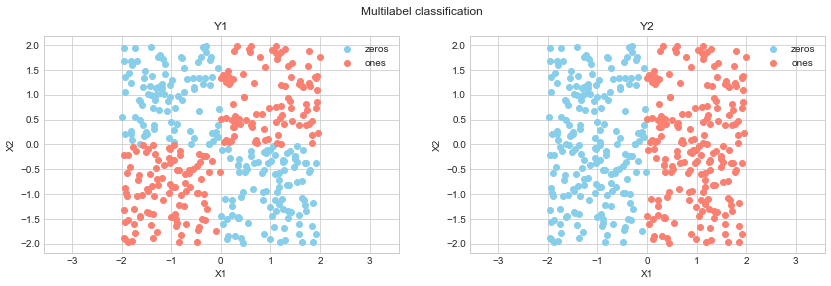

In [3]:
def xor_data(points:int, low, high):
    
    center = (high+low)/2    
    cluster_points = points // 4
    
    x1 = np.vstack(( np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)) ))

    x2 = np.vstack(( np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=center, high=high, size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)),
                     np.random.uniform(low=low, high=center,  size=(cluster_points,1)) ))

    x = np.hstack((x1,x2))

    y1 = np.vstack(( np.zeros((cluster_points,1)),
                     np.ones((cluster_points,1)),
                     np.ones((cluster_points,1)),
                     np.zeros((cluster_points,1)) ))
    
    y2 = np.vstack(( np.zeros((cluster_points,1)),
                     np.ones((cluster_points,1)),
                     np.zeros((cluster_points,1)),
                     np.ones((cluster_points,1)) ))
    
    y = np.hstack((y1,y2))

    
    return x,y

x,y = xor_data(points=400, low=-2, high=2)

plot_points(x,y)

### TF

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Model
- Try `"relu"` and `"swish"`

In [7]:
inputs = keras.Input(shape=(2,), name="INPUT")
layer1 = layers.Dense(4, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_1')(inputs)
layer2 = layers.Dense(3, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_2')(layer1)
layer3 = layers.Dense(2, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(layer2)

model = keras.Model(inputs=inputs, outputs=layer3)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 4)                 12        
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 3)                 15        
_________________________________________________________________
OUTPUT (Dense)               (None, 2)                 8         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
all_w1 = []
all_w2 = []
all_b1 = []
all_b2 = []

def save_weights_per_epoch(batch, logs):
    global all_w1
    global all_w2
    
    w1, b1 = model.layers[1].get_weights()
    w2, b2 = model.layers[2].get_weights()
    
    all_w1.append(w1)
    all_w2.append(w2)
    all_b1.append(b1)
    all_b2.append(b2)

In [9]:
model.compile(loss      = "binary_crossentropy", # "hinge"
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['binary_accuracy', 'categorical_accuracy'])

train_hist = model.fit(x, y,
                       epochs=1000,
                       batch_size=64,
                       callbacks=[keras.callbacks.LambdaCallback(on_epoch_begin=save_weights_per_epoch)])

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.9115 - binary_accuracy: 0.4641 - categorical_accuracy: 0.5806
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.6996 - binary_accuracy: 0.4959 - categorical_accuracy: 0.4882
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.6175 - binary_accuracy: 0.5919 - categorical_accuracy: 0.4974
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5820 - binary_accuracy: 0.6210 - categorical_accuracy: 0.5174
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5847 - binary_accuracy: 0.6401 - categorical_accuracy: 0.5095
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5527 - binary_accuracy: 0.6683 - categorical_accuracy: 0.5209
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.5481 - binary_accuracy: 0.6807 - categorical_accuracy: 0.5223
Epoch 8/1000
7/7 [==============================

7/7 [==============================] - 0s 2ms/step - loss: 0.2332 - binary_accuracy: 0.9283 - categorical_accuracy: 0.7657
Epoch 61/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2287 - binary_accuracy: 0.9359 - categorical_accuracy: 0.7798
Epoch 62/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2214 - binary_accuracy: 0.9443 - categorical_accuracy: 0.7945
Epoch 63/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2238 - binary_accuracy: 0.9437 - categorical_accuracy: 0.7894
Epoch 64/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2133 - binary_accuracy: 0.9506 - categorical_accuracy: 0.7751
Epoch 65/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2188 - binary_accuracy: 0.9490 - categorical_accuracy: 0.7966
Epoch 66/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2104 - binary_accuracy: 0.9439 - categorical_accuracy: 0.7960
Epoch 67/1000
7/7 [==============================] - 0s

7/7 [==============================] - 0s 2ms/step - loss: 0.1030 - binary_accuracy: 0.9767 - categorical_accuracy: 0.8851
Epoch 120/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0954 - binary_accuracy: 0.9770 - categorical_accuracy: 0.8861
Epoch 121/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1012 - binary_accuracy: 0.9805 - categorical_accuracy: 0.8793
Epoch 122/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1007 - binary_accuracy: 0.9679 - categorical_accuracy: 0.9019
Epoch 123/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0904 - binary_accuracy: 0.9789 - categorical_accuracy: 0.8918
Epoch 124/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0981 - binary_accuracy: 0.9771 - categorical_accuracy: 0.9018
Epoch 125/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0946 - binary_accuracy: 0.9799 - categorical_accuracy: 0.8815
Epoch 126/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0736 - binary_accuracy: 0.9787 - categorical_accuracy: 0.8992
Epoch 178/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0683 - binary_accuracy: 0.9811 - categorical_accuracy: 0.8959
Epoch 179/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0701 - binary_accuracy: 0.9773 - categorical_accuracy: 0.8956
Epoch 180/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0621 - binary_accuracy: 0.9850 - categorical_accuracy: 0.8944
Epoch 181/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0776 - binary_accuracy: 0.9815 - categorical_accuracy: 0.8853
Epoch 182/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0668 - binary_accuracy: 0.9855 - categorical_accuracy: 0.9125
Epoch 183/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0640 - binary_accuracy: 0.9827 - categorical_accuracy: 0.9046
Epoch 184/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0503 - binary_accuracy: 0.9832 - categorical_accuracy: 0.9141
Epoch 237/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0515 - binary_accuracy: 0.9892 - categorical_accuracy: 0.8962
Epoch 238/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0501 - binary_accuracy: 0.9868 - categorical_accuracy: 0.8929
Epoch 239/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0590 - binary_accuracy: 0.9885 - categorical_accuracy: 0.8923
Epoch 240/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0550 - binary_accuracy: 0.9834 - categorical_accuracy: 0.9063
Epoch 241/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0481 - binary_accuracy: 0.9867 - categorical_accuracy: 0.9088
Epoch 242/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0538 - binary_accuracy: 0.9904 - categorical_accuracy: 0.8841
Epoch 243/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0484 - binary_accuracy: 0.9847 - categorical_accuracy: 0.8873
Epoch 295/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0473 - binary_accuracy: 0.9878 - categorical_accuracy: 0.8871
Epoch 296/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0489 - binary_accuracy: 0.9827 - categorical_accuracy: 0.8928
Epoch 297/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0496 - binary_accuracy: 0.9878 - categorical_accuracy: 0.8926
Epoch 298/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0458 - binary_accuracy: 0.9885 - categorical_accuracy: 0.9028
Epoch 299/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0439 - binary_accuracy: 0.9913 - categorical_accuracy: 0.8918
Epoch 300/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0472 - binary_accuracy: 0.9887 - categorical_accuracy: 0.8827
Epoch 301/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0375 - binary_accuracy: 0.9919 - categorical_accuracy: 0.9057
Epoch 354/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0437 - binary_accuracy: 0.9880 - categorical_accuracy: 0.9036
Epoch 355/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0363 - binary_accuracy: 0.9939 - categorical_accuracy: 0.9019
Epoch 356/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0372 - binary_accuracy: 0.9937 - categorical_accuracy: 0.9172
Epoch 357/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0389 - binary_accuracy: 0.9943 - categorical_accuracy: 0.8828
Epoch 358/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0340 - binary_accuracy: 0.9936 - categorical_accuracy: 0.8863
Epoch 359/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0496 - binary_accuracy: 0.9835 - categorical_accuracy: 0.9265
Epoch 360/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0335 - binary_accuracy: 0.9910 - categorical_accuracy: 0.9217
Epoch 412/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0352 - binary_accuracy: 0.9927 - categorical_accuracy: 0.9069
Epoch 413/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0373 - binary_accuracy: 0.9937 - categorical_accuracy: 0.8976
Epoch 414/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0338 - binary_accuracy: 0.9890 - categorical_accuracy: 0.9229
Epoch 415/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0315 - binary_accuracy: 0.9922 - categorical_accuracy: 0.9094
Epoch 416/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0368 - binary_accuracy: 0.9912 - categorical_accuracy: 0.8904
Epoch 417/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0363 - binary_accuracy: 0.9932 - categorical_accuracy: 0.8995
Epoch 418/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0314 - binary_accuracy: 0.9848 - categorical_accuracy: 0.9137
Epoch 471/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0371 - binary_accuracy: 0.9871 - categorical_accuracy: 0.9118
Epoch 472/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0347 - binary_accuracy: 0.9969 - categorical_accuracy: 0.8887
Epoch 473/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0303 - binary_accuracy: 0.9961 - categorical_accuracy: 0.9054
Epoch 474/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0305 - binary_accuracy: 0.9953 - categorical_accuracy: 0.8940
Epoch 475/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0333 - binary_accuracy: 0.9957 - categorical_accuracy: 0.9127
Epoch 476/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0319 - binary_accuracy: 0.9918 - categorical_accuracy: 0.9058
Epoch 477/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0270 - binary_accuracy: 0.9932 - categorical_accuracy: 0.8970
Epoch 530/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0285 - binary_accuracy: 0.9950 - categorical_accuracy: 0.8931
Epoch 531/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0292 - binary_accuracy: 0.9928 - categorical_accuracy: 0.9039
Epoch 532/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0322 - binary_accuracy: 0.9924 - categorical_accuracy: 0.9026
Epoch 533/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0282 - binary_accuracy: 0.9947 - categorical_accuracy: 0.9122
Epoch 534/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0271 - binary_accuracy: 0.9969 - categorical_accuracy: 0.9031
Epoch 535/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0307 - binary_accuracy: 0.9872 - categorical_accuracy: 0.9085
Epoch 536/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0246 - binary_accuracy: 0.9963 - categorical_accuracy: 0.9077
Epoch 589/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0364 - binary_accuracy: 0.9918 - categorical_accuracy: 0.8925
Epoch 590/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0299 - binary_accuracy: 0.9920 - categorical_accuracy: 0.9074
Epoch 591/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0270 - binary_accuracy: 0.9963 - categorical_accuracy: 0.9065
Epoch 592/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0226 - binary_accuracy: 0.9954 - categorical_accuracy: 0.9053
Epoch 593/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0328 - binary_accuracy: 0.9893 - categorical_accuracy: 0.8911
Epoch 594/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0254 - binary_accuracy: 0.9947 - categorical_accuracy: 0.9048
Epoch 595/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0198 - binary_accuracy: 0.9944 - categorical_accuracy: 0.9188
Epoch 648/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0272 - binary_accuracy: 0.9907 - categorical_accuracy: 0.9165
Epoch 649/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0289 - binary_accuracy: 0.9915 - categorical_accuracy: 0.9082
Epoch 650/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0250 - binary_accuracy: 0.9916 - categorical_accuracy: 0.8960
Epoch 651/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0237 - binary_accuracy: 0.9959 - categorical_accuracy: 0.9119
Epoch 652/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0232 - binary_accuracy: 0.9954 - categorical_accuracy: 0.9222
Epoch 653/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0264 - binary_accuracy: 0.9935 - categorical_accuracy: 0.9075
Epoch 654/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0249 - binary_accuracy: 0.9927 - categorical_accuracy: 0.9105
Epoch 707/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0229 - binary_accuracy: 0.9937 - categorical_accuracy: 0.9239
Epoch 708/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0227 - binary_accuracy: 0.9915 - categorical_accuracy: 0.9001
Epoch 709/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0198 - binary_accuracy: 0.9953 - categorical_accuracy: 0.9040
Epoch 710/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0253 - binary_accuracy: 0.9940 - categorical_accuracy: 0.9025
Epoch 711/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0241 - binary_accuracy: 0.9949 - categorical_accuracy: 0.9038
Epoch 712/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0202 - binary_accuracy: 0.9977 - categorical_accuracy: 0.9072
Epoch 713/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0294 - binary_accuracy: 0.9877 - categorical_accuracy: 0.9027
Epoch 765/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0232 - binary_accuracy: 0.9913 - categorical_accuracy: 0.9000
Epoch 766/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0215 - binary_accuracy: 0.9952 - categorical_accuracy: 0.9112
Epoch 767/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0202 - binary_accuracy: 0.9943 - categorical_accuracy: 0.9227
Epoch 768/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0234 - binary_accuracy: 0.9953 - categorical_accuracy: 0.9066
Epoch 769/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0215 - binary_accuracy: 0.9953 - categorical_accuracy: 0.9167
Epoch 770/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0237 - binary_accuracy: 0.9961 - categorical_accuracy: 0.9301
Epoch 771/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0209 - binary_accuracy: 0.9937 - categorical_accuracy: 0.9030
Epoch 824/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0218 - binary_accuracy: 0.9932 - categorical_accuracy: 0.9213
Epoch 825/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0215 - binary_accuracy: 0.9954 - categorical_accuracy: 0.9119
Epoch 826/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0227 - binary_accuracy: 0.9941 - categorical_accuracy: 0.9103
Epoch 827/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0191 - binary_accuracy: 0.9971 - categorical_accuracy: 0.9078
Epoch 828/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0345 - binary_accuracy: 0.9913 - categorical_accuracy: 0.9047
Epoch 829/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0576 - binary_accuracy: 0.9863 - categorical_accuracy: 0.9049
Epoch 830/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0262 - binary_accuracy: 0.9914 - categorical_accuracy: 0.9161
Epoch 883/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0256 - binary_accuracy: 0.9925 - categorical_accuracy: 0.9230
Epoch 884/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0254 - binary_accuracy: 0.9904 - categorical_accuracy: 0.9221
Epoch 885/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0210 - binary_accuracy: 0.9907 - categorical_accuracy: 0.9172
Epoch 886/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0260 - binary_accuracy: 0.9916 - categorical_accuracy: 0.9255
Epoch 887/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0234 - binary_accuracy: 0.9911 - categorical_accuracy: 0.9183
Epoch 888/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0226 - binary_accuracy: 0.9944 - categorical_accuracy: 0.9130
Epoch 889/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0182 - binary_accuracy: 0.9964 - categorical_accuracy: 0.9270
Epoch 942/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0221 - binary_accuracy: 0.9933 - categorical_accuracy: 0.9247
Epoch 943/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0247 - binary_accuracy: 0.9911 - categorical_accuracy: 0.8991
Epoch 944/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0370 - binary_accuracy: 0.9915 - categorical_accuracy: 0.9134
Epoch 945/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0176 - binary_accuracy: 0.9956 - categorical_accuracy: 0.9062
Epoch 946/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0158 - binary_accuracy: 0.9966 - categorical_accuracy: 0.9276
Epoch 947/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0198 - binary_accuracy: 0.9966 - categorical_accuracy: 0.9198
Epoch 948/1000
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0178 - binary_accuracy: 0.9942 - categorical_accuracy: 0.9248


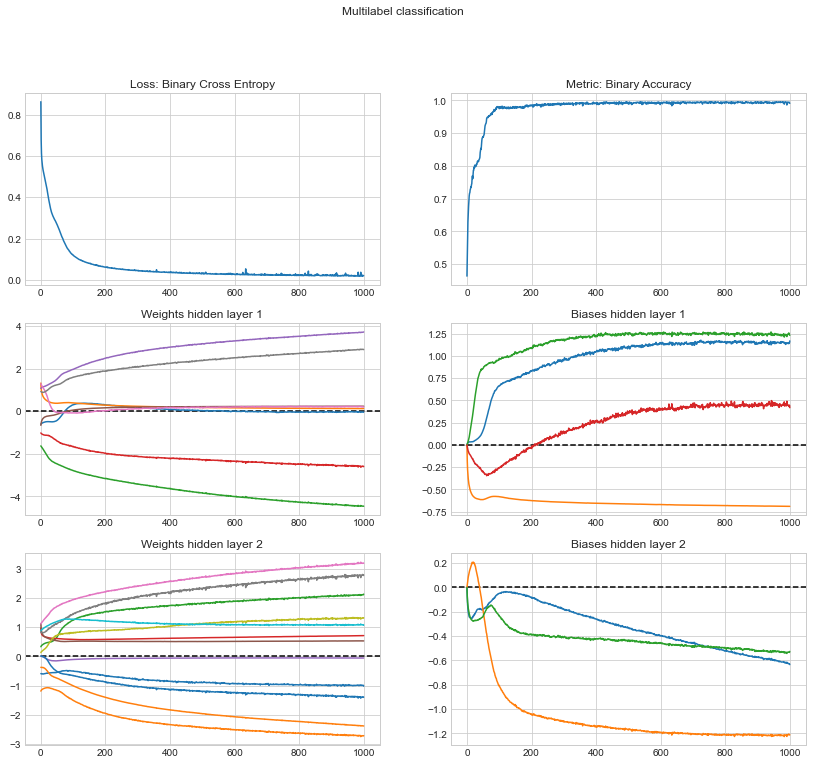

In [10]:
def plot_weights(weights, ax):
    weights = np.array(weights)
    ax.axhline(0, color='black', linestyle='dashed')
    for i in range(weights.shape[1]):
        for j in range(weights.shape[2]):
            ax.plot(weights[:,i,j])
    
def plot_biases(biases, ax):
    biases = np.array(biases)
    ax.axhline(0, color='black', linestyle='dashed')
    for i in range(biases.shape[1]):
        ax.plot(biases[:,i])


fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
fig.suptitle('Multilabel classification')
    
ax[0,0].plot(train_hist.history["loss"])
ax[0,0].set_title("Loss: Binary Cross Entropy")

ax[0,1].plot(train_hist.history["binary_accuracy"])
ax[0,1].set_title("Metric: Binary Accuracy")

plot_weights(all_w1, ax[1,0])
ax[1,0].set_title("Weights hidden layer 1")

plot_biases(all_b1, ax[1,1])
ax[1,1].set_title("Biases hidden layer 1")

plot_weights(all_w2, ax[2,0])
ax[2,0].set_title("Weights hidden layer 2")

plot_biases(all_b2, ax[2,1])
ax[2,1].set_title("Biases hidden layer 2");

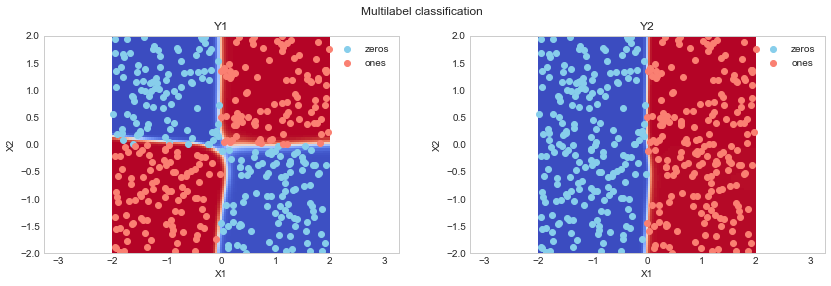

In [11]:
def subplot_surface(x1, x2, y, ax):
    ax.pcolormesh(x1, x2, y, vmin=0, vmax=1, cmap="coolwarm", shading='auto')
    #plt.colorbar()
    #plt.xlabel('X1')
    #plt.ylabel('X2')
    ax.axis("equal")
    #plt.show()
    
def plot_surface(minimum, maximun, resolution):
    
    # GENERATE GRID X DATA
    x1_indexes = np.linspace(minimum, maximun, resolution)
    x2_indexes = np.linspace(minimum, maximun, resolution)
    x1, x2 = np.meshgrid(x1_indexes, x2_indexes)
    x_grid = np.hstack(( x1.reshape(resolution*resolution,-1), x2.reshape(resolution*resolution,-1) ))
    
    # FOWARD MODEL
    preds = model.predict(x_grid)
    p1    = preds[:,0].reshape(resolution, resolution)
    p2    = preds[:,1].reshape(resolution, resolution)
    
    # SUBPLOTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    fig.suptitle('Multilabel classification')
    subplot_surface(x1, x2, p1, ax1)
    subplot_surface(x1, x2, p2, ax2)
    subplot_points(x, y[:,0], ax1, "Y1")
    subplot_points(x, y[:,1], ax2, "Y2")

plot_surface(minimum=-2, maximun=2, resolution=100)

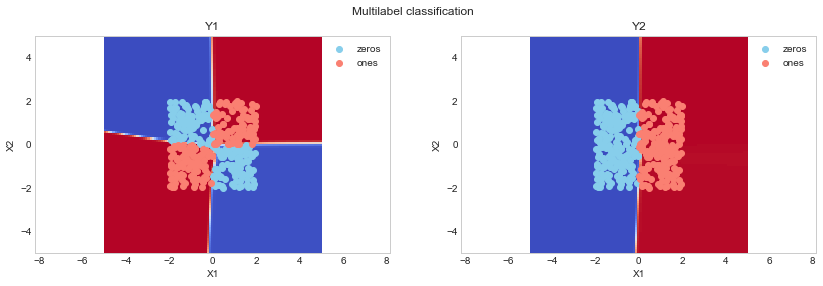

In [12]:
plot_surface(minimum=-5, maximun=5, resolution=100)

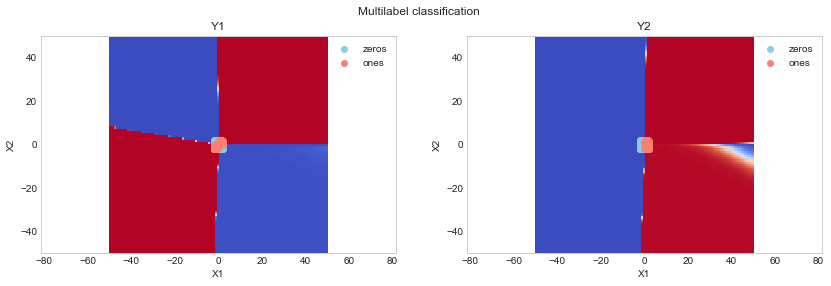

In [13]:
plot_surface(minimum=-50, maximun=50, resolution=100)